<a href="https://colab.research.google.com/github/YosefOwenM-0905/Implementation-Of-Indobert-On-UserReviewsOfThePlnMobile-Application-BasedOnIndonesianLanguageLexicon/blob/main/Implementation_Of_Indobert_On_User_Reviews_Of_The_Pln_Mobile_Application_Based_On_Indonesian_Language_Lexicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('web_scraping.csv')
df

,nama_user,rating,waktu,ulasan
0,jalan istiqomah,5,2022-06-23 15:33:45,"Sangat membantu,urusan jadi lebih mudah. Namun..."
1,Iwang Ridwan,1,2022-06-23 15:00:18,Udah pengajuan menambah speed iconnet dari 10m...
2,Boika Situmorang,1,2022-06-23 14:59:38,Aplikasi membingungkan. Bagaimana pelanggan ak...
3,Rezky Akbar Ramadhan,1,2022-06-23 14:43:33,Kan sy mau pasang iconnet nih terus tdi teknis...
4,Bangsamik Samik,5,2022-06-23 14:17:21,"Kenapa pln mobil blum bisa top up saldo,kog ma..."
...,...,...,...,...
995,Muhammad Ramadhansyah,5,2022-01-09 21:30:50,Mengapa fitur data pembayaran yg sdh dilakukan...
996,dimas apriando prabowo,5,2022-01-09 20:51:30,"Sesuai motonya ""semua makin mudah"", Laporan Ga..."
997,Haidar asraf91,4,2022-01-05 18:15:50,"Say kasih bintang 4 dulu,saya sangat kesulitan..."
998,Hari Vickyantoro,2,2022-01-03 14:02:40,"Untuk menu penyambungan baru, ketika menentuka..."


In [ ]:
# Create several functions for the preprocessing stage,
# starting from CaseFolding, Tokenization, Filtering and Steming to normalization
import string
import re
def filteringText(ulasan):
    ulasan = re.sub(r'@[A-Za-z0-9]+', '', ulasan)
    ulasan = re.sub(r'#[A-Za-z0-9]+', '', ulasan)
    ulasan = re.sub(r'RT[\s]', '', ulasan)
    ulasan = re.sub(r"http\S+", '', ulasan)
    ulasan = re.sub(r'[0-9]+', '', ulasan)
    ulasan = re.sub(r'(.)\1+',r'\1\1', ulasan)
    ulasan = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',ulasan)
    ulasan = re.sub(r'[^a-zA-Z]',' ', ulasan)
    ulasan = re.sub(r'\b(\w+)( \1\b)+', r'\1', ulasan)
    ulasan = ulasan.replace('\n', ' ')
    ulasan = ulasan.translate(str.maketrans('', '', string.punctuation))
    ulasan = ulasan.strip(' ')
    return ulasan

def casefoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

from nltk.tokenize import word_tokenize
def tokenizingText(ulasan):
    ulasan = word_tokenize(ulasan)
    return ulasan

data_slang = pd.read_csv('kamus_slangword.csv')
def replace_slang(ulasan):
    res = ''
    for item in ulasan.split():
        if item in data_slang.slang.values:
            res += data_slang[data_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

from nltk.corpus import stopwords
def stopwords_removal(ulasan):
    filtering = stopwords.words('indonesian','english')
    x=[]
    data=[]
    def myFunc(x):

        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, ulasan)
    for x in fit:
        data.append(x)
    return data


def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

#Displays the results of the pre-processing process

In [ ]:
#Case Folding
df['preprocessing'] = df['ulasan'].apply(casefoldingText)
df.to_csv('casefoldingText.csv')
df[['ulasan', 'preprocessing']]

,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","sangat membantu,urusan jadi lebih mudah. namun..."
1,Udah pengajuan menambah speed iconnet dari 10m...,udah pengajuan menambah speed iconnet dari 10m...
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,aplikasi membingungkan. bagaimana pelanggan ak...
3,Kan sy mau pasang iconnet nih terus tdi teknis...,kan sy mau pasang iconnet nih terus tdi teknis...
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","kenapa pln mobil blum bisa top up saldo,kog ma..."
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,mengapa fitur data pembayaran yg sdh dilakukan...
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","sesuai motonya ""semua makin mudah"", laporan ga..."
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","say kasih bintang 4 dulu,saya sangat kesulitan..."
998,"Untuk menu penyambungan baru, ketika menentuka...","untuk menu penyambungan baru, ketika menentuka..."


In [ ]:
#slangword
df['preprocessing'] = df['preprocessing'].apply(replace_slang)
df.to_csv('replace_slang.csv')
df[['ulasan', 'preprocessing']]

,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","sangat membantu,urusan jadi lebih mudah. namun..."
1,Udah pengajuan menambah speed iconnet dari 10m...,sudah pengajuan menambah speed iconnet dari 10...
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,aplikasi membingungkan. bagaimana pelanggan ak...
3,Kan sy mau pasang iconnet nih terus tdi teknis...,kan saya mau pasang iconnet ini terus tadi tek...
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","kenapa pln mobil belum bisa bagus up saldo,kog..."
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,mengapa fitur data pembayaran yang sudah dilak...
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","sesuai motonya ""semua makin mudah"", laporan ga..."
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","saya kasih bintang 4 dulu,saya sangat kesulita..."
998,"Untuk menu penyambungan baru, ketika menentuka...","untuk menu penyambungan baru, ketika menentuka..."


In [ ]:
#filtering
df['preprocessing'] = df['preprocessing'].apply(filteringText)
df.to_csv('filteringText.csv')
df[['ulasan', 'preprocessing']]

,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...",sangat membantu urusan jadi lebih mudah namun...
1,Udah pengajuan menambah speed iconnet dari 10m...,sudah pengajuan menambah speed iconnet dari mb...
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,aplikasi membingungkan bagaimana pelanggan ak...
3,Kan sy mau pasang iconnet nih terus tdi teknis...,kan saya mau pasang iconnet ini terus tadi tek...
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...",kenapa pln mobil belum bisa bagus up saldo kog...
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,mengapa fitur data pembayaran yang sudah dilak...
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...",sesuai motonya semua makin mudah laporan ga...
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...",saya kasih bintang dulu saya sangat kesulitan...
998,"Untuk menu penyambungan baru, ketika menentuka...",untuk menu penyambungan baru ketika menentuka...


In [ ]:
#token
import nltk
nltk.download('punkt')
df['preprocessing'] = df['preprocessing'].apply(tokenizingText)
df.to_csv('tokenizingText.csv')
df[['ulasan', 'preprocessing']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","[sangat, membantu, urusan, jadi, lebih, mudah,..."
1,Udah pengajuan menambah speed iconnet dari 10m...,"[sudah, pengajuan, menambah, speed, iconnet, d..."
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,"[aplikasi, membingungkan, bagaimana, pelanggan..."
3,Kan sy mau pasang iconnet nih terus tdi teknis...,"[kan, saya, mau, pasang, iconnet, ini, terus, ..."
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","[kenapa, pln, mobil, belum, bisa, bagus, up, s..."
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,"[mengapa, fitur, data, pembayaran, yang, sudah..."
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","[sesuai, motonya, semua, makin, mudah, laporan..."
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","[saya, kasih, bintang, dulu, saya, sangat, kes..."
998,"Untuk menu penyambungan baru, ketika menentuka...","[untuk, menu, penyambungan, baru, ketika, mene..."


In [ ]:
#Stopword Removal
import nltk
nltk.download('stopwords')
df['preprocessing'] = df['preprocessing'].apply(stopwords_removal)
df.to_csv('stopwords_removal.csv')
df[['ulasan', 'preprocessing']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","[membantu, urusan, mudah, buka, aplikasinya, b..."
1,Udah pengajuan menambah speed iconnet dari 10m...,"[pengajuan, menambah, speed, iconnet, mbps, mb..."
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,"[aplikasi, membingungkan, pelanggan, memahami,..."
3,Kan sy mau pasang iconnet nih terus tdi teknis...,"[pasang, iconnet, teknisi, pasang, tersedianya..."
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","[pln, mobil, bagus, up, saldo, kog, account, b..."
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, pembayaran, dibanding, versi, di..."
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","[sesuai, motonya, mudah, laporan, gangguan, ke..."
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","[kasih, bintang, kesulitan, masuk, fitur, ubah..."
998,"Untuk menu penyambungan baru, ketika menentuka...","[menu, penyambungan, menentukan, titik, lokasi..."


In [ ]:
#stemming
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
df['stemming_ulasan'] = df['preprocessing'].apply(stemming)
df.to_csv('stemming.csv')
df[['preprocessing', 'stemming_ulasan']]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
bantu urus mudah buka aplikasi berat banget muter thank salam sukses
aju tambah speed iconnet mbps mbps info gmail pesan informasi
aplikasi bingung langgan paham slo nidi jelas detail contoh pasang listrik ubah daya bingung inti bodoh
pasang iconnet teknisi pasang sedia tower rumah cek aplikasi tercover aju kembali dana tanggap pln nya
pln mobil bagus up saldo kog account bank biaya adminnya mahal banding aplikasi kalo bagus up biaya murah
aplikasi aneh input data login kode otp kirim jaring server periksa jaring masuk cek tagih masuk idpl jaring server masalah ganggu pusat periksa operator mu mudah buang kuota menuhin ram hp hapus iya
ubah bintang ya error aplikasi cek riwayat beli token tolong perhati
aplikasi nya lengkap bgt pakai fitur adu langsung direspon siipp mudah langgan
aplikasi bantu bayar cepat malam malas langsung isi pln mobile biaya admin jangkau keren bantu langgan mudah kait pln sukses pl

,preprocessing,stemming_ulasan
0,"[membantu, urusan, mudah, buka, aplikasinya, b...",bantu urus mudah buka aplikasi berat banget mu...
1,"[pengajuan, menambah, speed, iconnet, mbps, mb...",aju tambah speed iconnet mbps mbps info gmail ...
2,"[aplikasi, membingungkan, pelanggan, memahami,...",aplikasi bingung langgan paham slo nidi jelas ...
3,"[pasang, iconnet, teknisi, pasang, tersedianya...",pasang iconnet teknisi pasang sedia tower ruma...
4,"[pln, mobil, bagus, up, saldo, kog, account, b...",pln mobil bagus up saldo kog account bank biay...
...,...,...
995,"[fitur, data, pembayaran, dibanding, versi, di...",fitur data bayar banding versi muncul fitur in...
996,"[sesuai, motonya, mudah, laporan, gangguan, ke...",sesuai moto mudah lapor ganggu keluh listrik m...
997,"[kasih, bintang, kesulitan, masuk, fitur, ubah...",kasih bintang sulit masuk fitur ubah daya tari...
998,"[menu, penyambungan, menentukan, titik, lokasi...",menu sambung tentu titik lokasi terang nya jal...


#Labeling with Inset Lexicon

In [ ]:
lexicon_positive = pd.read_excel('kamus_positif.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('kamus_negatif.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(ulasan):
    score = 0
    for word in ulasan:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in ulasan:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positif'
    elif (score < 0):
        sentimen = 'negatif'
    else:
        sentimen = 'netral'
    return score, sentimen

results = df['preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['label'] = results[0]
#data['sentimen'] = results[1]
#data

df['label'] = results[1]
dataSentimen = df
data_inset = df

data_inset[['ulasan', 'preprocessing', 'label']]

,ulasan,preprocessing,label
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","[membantu, urusan, mudah, buka, aplikasinya, b...",positif
1,Udah pengajuan menambah speed iconnet dari 10m...,"[pengajuan, menambah, speed, iconnet, mbps, mb...",netral
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,"[aplikasi, membingungkan, pelanggan, memahami,...",negatif
3,Kan sy mau pasang iconnet nih terus tdi teknis...,"[pasang, iconnet, teknisi, pasang, tersedianya...",netral
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","[pln, mobil, bagus, up, saldo, kog, account, b...",positif
...,...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, pembayaran, dibanding, versi, di...",netral
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","[sesuai, motonya, mudah, laporan, gangguan, ke...",positif
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","[kasih, bintang, kesulitan, masuk, fitur, ubah...",negatif
998,"Untuk menu penyambungan baru, ketika menentuka...","[menu, penyambungan, menentukan, titik, lokasi...",netral


In [ ]:
df['label'].value_counts()

positif    482
netral     374
negatif    144
Name: label, dtype: int64

<Axes: ylabel='label'>

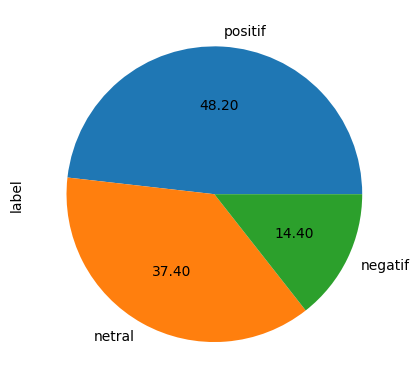

In [ ]:
df['label'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data = df[['stemming_ulasan', 'label']]
data

,stemming_ulasan,label
0,bantu urus mudah buka aplikasi berat banget mu...,positif
1,aju tambah speed iconnet mbps mbps info gmail ...,netral
2,aplikasi bingung langgan paham slo nidi jelas ...,negatif
3,pasang iconnet teknisi pasang sedia tower ruma...,netral
4,pln mobil bagus up saldo kog account bank biay...,positif
...,...,...
995,fitur data bayar banding versi muncul fitur in...,netral
996,sesuai moto mudah lapor ganggu keluh listrik m...,positif
997,kasih bintang sulit masuk fitur ubah daya tari...,negatif
998,menu sambung tentu titik lokasi terang nya jal...,netral


In [ ]:
data.to_csv('hasil_labelling.csv', index = False)

In [ ]:
data = pd.read_csv('hasil_labelling.csv')
data.head()

,stemming_ulasan,label
0,bantu urus mudah buka aplikasi berat banget mu...,positif
1,aju tambah speed iconnet mbps mbps info gmail ...,netral
2,aplikasi bingung langgan paham slo nidi jelas ...,negatif
3,pasang iconnet teknisi pasang sedia tower ruma...,netral
4,pln mobil bagus up saldo kog account bank biay...,positif


In [ ]:
data.replace(to_replace='negatif', value=0, inplace=True)
data.replace(to_replace='positif', value=1, inplace=True)
data.replace(to_replace='netral', value=2, inplace=True)
data.head()

,stemming_ulasan,label
0,bantu urus mudah buka aplikasi berat banget mu...,1
1,aju tambah speed iconnet mbps mbps info gmail ...,2
2,aplikasi bingung langgan paham slo nidi jelas ...,0
3,pasang iconnet teknisi pasang sedia tower ruma...,2
4,pln mobil bagus up saldo kog account bank biay...,1


#Split Data

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (800, 2)
Validation data shape: (100, 2)
Test data shape: (100, 2)


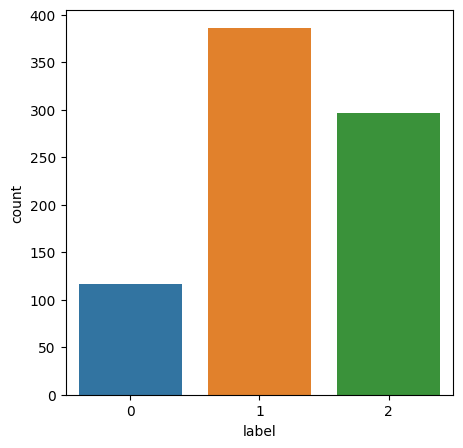

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

In [ ]:
df_train.to_csv('data_training.csv', index = False)

In [ ]:
data = pd.read_csv('data_training.csv')
data.head()

,stemming_ulasan,label
0,aplikasi sungguh mudah transaksi beli token li...,1
1,aplikasi mudah lapor ganggu keluh aju mohon da...,1
2,aplikasi sesuai bayar aplikasi fast respon and...,2
3,metode bayar flexible pakai e wallet pakai tra...,2
4,aplikasi nya respon cepat tugas lapang mudah m...,1


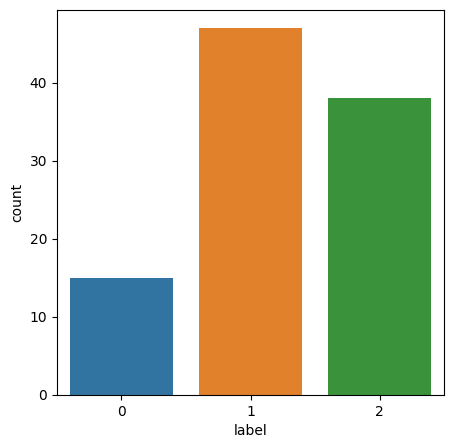

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

In [ ]:
df_val.to_csv('data_validasi.csv', index = False)

In [ ]:
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_ulasan,label
0,aplikasi bantu bagus up token listrik prabayar...,2
1,pln mobile mudah layan layan tunggu masyarakat...,2
2,daftar aplikasi gagal sambung server mohon baik,2
3,aplikasi nya bantu mudah kece tagih bulan cata...,1
4,aplikasi manfaat bilamana unit posko pln mobil...,2


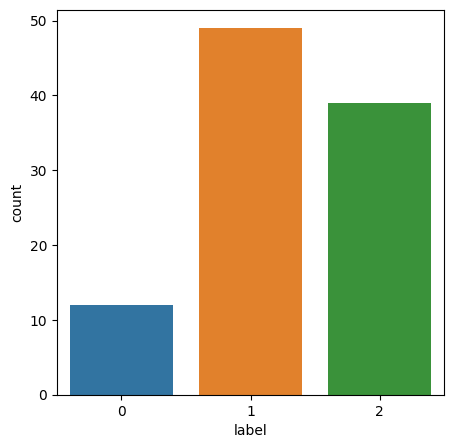

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
df_test.to_csv('data_testing.csv', index = False)

In [ ]:
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_ulasan,label
0,aplikasi bantu bagus up token listrik prabayar...,2
1,pln mobile mudah layan layan tunggu masyarakat...,2
2,daftar aplikasi gagal sambung server mohon baik,2
3,aplikasi nya bantu mudah kece tagih bulan cata...,1
4,aplikasi manfaat bilamana unit posko pln mobil...,2


IndoBERT Model

In [ ]:
#Modelling
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

In [ ]:
# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))
print(vocabulary)

Panjang vocabulary: 30521
{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '#

In [ ]:
# Example of Tokenization
# Retrieve the 1st index data on the dataframe
print('Kalimat:', df['stemming_ulasan'][1])
print('BERT Tokenizer:', bert_tokenizer.tokenize(df['stemming_ulasan'][1]))

Kalimat: aju tambah speed iconnet mbps mbps info gmail pesan informasi
BERT Tokenizer: ['pln', 'mobile', 'mudah', 'lay', '##an', 'lay', '##an', 'tunggu', 'masyarakat', 'ganggu', 'kantor', 'pln', 'daya', 'mudah', 'beli', 'token', 'catat', 'meter', 'pribadi', 'simulasi', 'ubah', 'daya', 'masuk', 'mohon', 'aplikasi', 'bangga', 'andal', 'teman', 'user', 'tangan', 'eksekusi', 'lapang', 'konsisten', 'jalan', 'sesuai', 'target', 'garis', 'capai', 'visi', 'misi', 'pln']


In [ ]:
# Example of input formatting for BERT.
# Input formatting can use 'encode_plus' function
bert_input = bert_tokenizer.encode_plus(
    # Sample sentences
    df['stemming_ulasan'][1],
    # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
    add_special_tokens = True,
    # Add padding to max_length using [PAD] token
    # jika kalimat kurang dari max_length
    padding = 'max_length',
    # Truncate if sentence is more than max_length
    truncation = 'longest_first',
    # Determine the max_length of the entire sentence
    max_length = 50,
    # Returns the attention mask value
    return_attention_mask = True,
    # Returns the value of token type id (segment embedding)
    return_token_type_ids =True)
# The function 'encode_plus' returns 3 values:
# input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# Original data
print('Kalimat\t\t:', df['stemming_ulasan'][1]) #1 denotes first order data or first review data
                                                   # so for example I change it to 1000 still 1 data appears but the order is 1000th
# Input formatting + tokenizer return
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# Input IDs: token indexes in the tokenizer vocabulary
print('Input IDs\t:', bert_input['input_ids'])
# Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
print('Token Type IDs\t:', bert_input['token_type_ids'])
# Attention mask : returns value [0,1].
#1 means masked token, 0 tokens are not masked (ignored)
print('Attention Mask\t:', bert_input['attention_mask'])

Kalimat		: aju tambah speed iconnet mbps mbps info gmail pesan informasi
Tokenizer	: ['[CLS]', 'aj', '##u', 'tambah', 'speed', 'icon', '##net', 'mbps', 'mbps', 'info', 'gmail', 'pesan', 'informasi', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 2116, 30360, 3837, 5097, 12407, 2681, 22355, 22355, 1617, 16908, 2054, 683, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

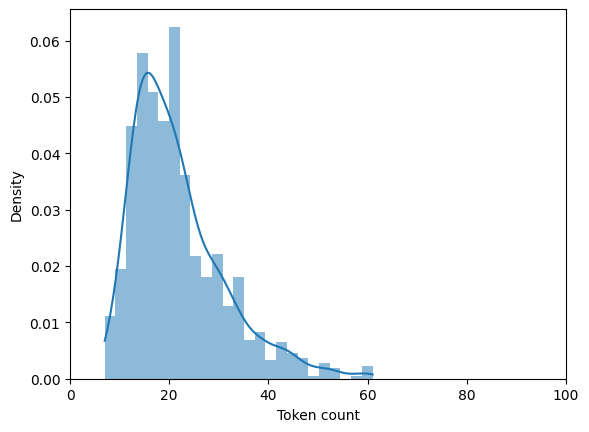

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# There are many ways to define max_length
# The intuition is that we don't want to cut sentences
# Or added too much padding (longer computation)

# In this example, max_length is determined from the distribution of tokens in the dataset
token_lens = []
for txt in df['stemming_ulasan']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Create a function to combine tokenization steps
# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [ ]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=3,
                              batch_size=32, validation_data=val_encoded)

Epoch 1/3
25/25 [==============================] - 316s 11s/step - loss: 0.9629 - accuracy: 0.5113 - val_loss: 0.7756 - val_accuracy: 0.6600
Epoch 2/3
25/25 [==============================] - 275s 11s/step - loss: 0.5984 - accuracy: 0.7600 - val_loss: 0.5767 - val_accuracy: 0.8000
Epoch 3/3
25/25 [==============================] - 272s 11s/step - loss: 0.3176 - accuracy: 0.8788 - val_loss: 0.5932 - val_accuracy: 0.7900
CPU times: user 22min 49s, sys: 41.9 s, total: 23min 31s
Wall time: 16min 47s


In [ ]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

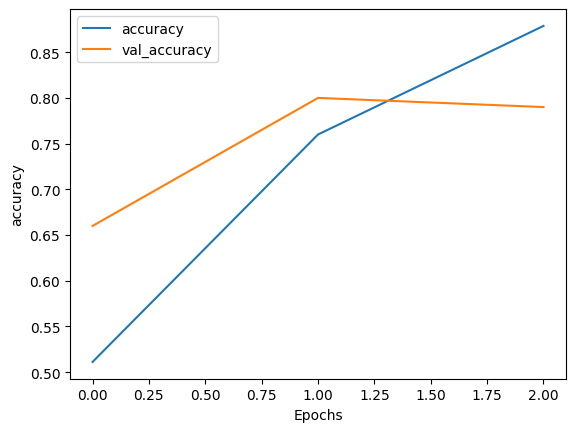

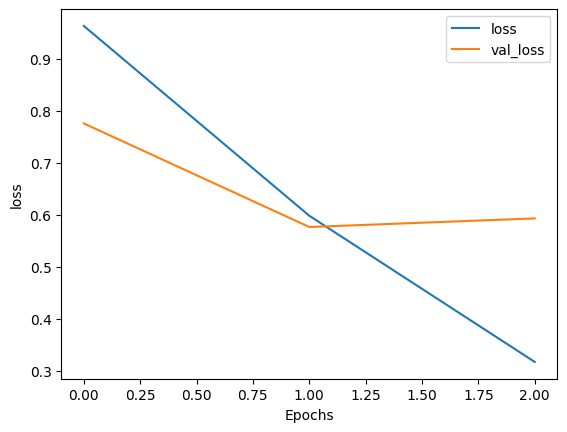

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(3):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i],
                                                            bert_history.history['loss'][i],
                                                            bert_history.history['val_accuracy'][i],
                                                            bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.511250 	   0.962890 	   0.660000 	   0.775613
       2   0.760000 	   0.598350 	   0.800000 	   0.576716
       3   0.878750 	   0.317606 	   0.790000 	   0.593226


In [ ]:
bert_model.save_weights('bert-model.h5')

In [ ]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

4/4 [==============================] - 9s 2s/step - loss: 0.6650 - accuracy: 0.8100
Test Accuracy: 0.8100000023841858
CPU times: user 17 s, sys: 101 ms, total: 17.1 s
Wall time: 10.3 s


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

4/4 [==============================] - 12s 2s/step


In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.81

In [ ]:
confusion_matrix(y_true, y_pred)

array([[11,  0,  1],
       [ 2, 37, 10],
       [ 4,  2, 33]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.95      0.76      0.84        49
           2       0.75      0.85      0.80        39

    accuracy                           0.81       100
   macro avg       0.78      0.84      0.80       100
weighted avg       0.84      0.81      0.81       100



In [ ]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)
bert_load_model.load_weights('bert-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Sample text
input_text = 'tolong dong diupgrade untuk di tambah riwayat penggunaan listrik harian supaya kita bisa lebih mudah lagi mengontrol penggunaan listrik setiap harinya terimakasih'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

sentiment_labels = ['netral','negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

print(input_text, ':',
      sentiment_labels[label[0]])

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tolong dong diupgrade untuk di tambah riwayat penggunaan listrik harian supaya kita bisa lebih mudah lagi mengontrol penggunaan listrik setiap harinya terimakasih : positif


In [ ]:
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

In [ ]:
sentiment_labels = ['netral','negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [ ]:
print(input_text, ':', sentiment_labels[label[0]])

tolong dong diupgrade untuk di tambah riwayat penggunaan listrik harian supaya kita bisa lebih mudah lagi mengontrol penggunaan listrik setiap harinya terimakasih : positif


In [ ]:
!pip install --upgrade scikit-learn

#Confusion Matrix

Text(50.722222222222214, 0.5, 'Label sebenarnya')

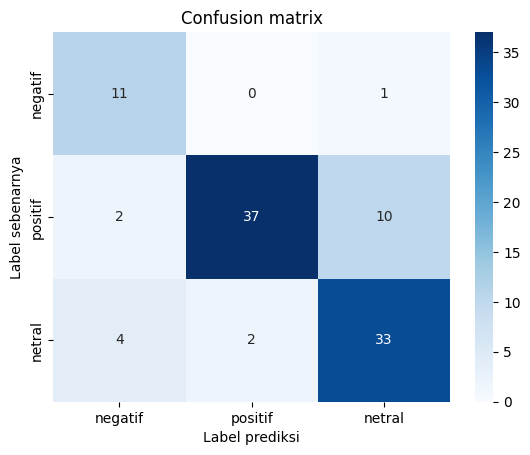

In [ ]:
import seaborn as sn
from pandas import DataFrame
confm = confusion_matrix(y_true, y_pred)
columns = ['negatif','positif','netral']
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

#WordCloud

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('positif')
owen = df_GROUPBY_label[['preprocessing','label']].get_group('positif')
owen.to_csv('positif.csv')

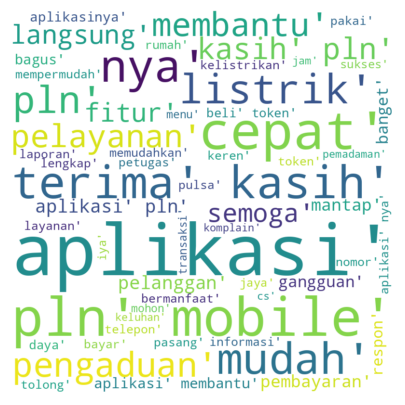

In [ ]:
positif = pd.read_csv('positif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  positif['preprocessing']])
wordCloud = WordCloud(colormap="viridis",background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('negatif')
owen = df_GROUPBY_label[['preprocessing','label']].get_group('negatif')
owen.to_csv('negatif.csv')

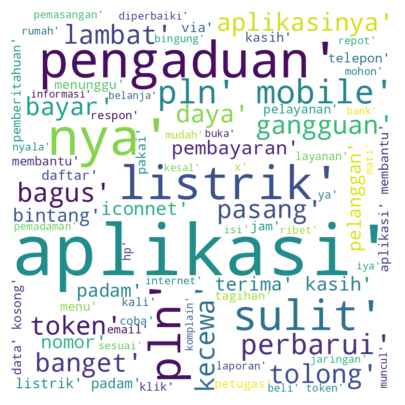

In [ ]:
negatif = pd.read_csv('negatif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  negatif['preprocessing']])
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('netral')
owen = df_GROUPBY_label[['preprocessing','label']].get_group('netral')
owen.to_csv('netral.csv')

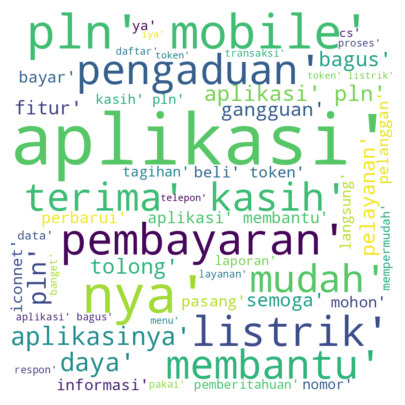

In [ ]:
netral = pd.read_csv('netral.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  netral['preprocessing']])
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=200, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()